# Dataset Visualization

* Token distribution
* Embedding clustering

In [2]:
import os
import json
import tiktoken
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.chdir("../")
from modules.chromadb_handler import ChromaDBHandler
from utils.jsons import load_json

## 1. Load Encoding

In [4]:
encoding = tiktoken.get_encoding("cl100k_base")

Use tiktoken.encoding_for_model() to automatically load the correct encoding for a given model name.

In [5]:
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

## 2. Turn text into tokens with encoding.encode()

The .encode() method converts a text string into a list of token integers.

In [6]:
encoding.encode("tiktoken is great!")

[83, 1609, 5963, 374, 2294, 0]

Count tokens by counting the length of the list returned by .encode().

In [7]:
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [8]:
num_tokens_from_string("tiktoken is great!", "cl100k_base")

6

## 3. Loading Golden Dataset

In [9]:
trials = ChromaDBHandler("data/collections/", 'ctrials').collection
trials.count()

No embedding_function provided, using default embedding function: DefaultEmbeddingFunction https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2


16508

In [10]:
dataset = load_json("data/raw/random_t_annotation_500_42.json")

In [11]:
# Selecting the ids only
dataset_ids = list(dataset.keys())
len(dataset_ids)

166

In [12]:
# Get the documents for the dataset ids
dataset_data = trials.get(ids=dataset_ids, include = ['documents', 'embeddings'])
dataset_docs = dataset_data['documents']

In [13]:
dataset_docs[0]

'This is an open-label, multicenter, dose-escalation and parallel-group expansion Phase II\n clinical trial to evaluate the efficacy, safety and tolerability of KN026 in combination with\n palbociclib and fulvestrant in women or male with HER2-positive metastatic breast cancer .The\n subjects will receive 20 mg/kg IV Q2W+ palbociclib 100/125 mg/day orally+/-Fulvestrant 500 mg\n IM until progressive disease, unacceptable toxicity or death.\n ;\n ;\n Inclusion Criteria:\n - Male or female subject >= 18 years;\n - Histologically or cytologically confirmed, metastatic or locally advanced unresectable\n HER2-positive;\n - Adequate organ function assessed within 7 days prior to first trial treatment\n - ECOG score 0 or 1;\n - Left ventricular ejection fraction (LVEF) ≥ 50% at baseline;\n - Life expectancy >3 months\n Exclusion Criteria:\n - Untreated active CNS metastasis or leptomeningeal metastasis;\n - Uncontrolled tumor-related pain;\n - Has received other anti-tumor treatment or an inve

## 4. Counting tokens for our Golden dataset

In [14]:
tokens = [num_tokens_from_string(doc, "cl100k_base") for doc in dataset_docs]

In [15]:
len(tokens)

166

## 5. Visualize token distribution

In [16]:
if not os.path.exists("images"):
    os.mkdir("images")

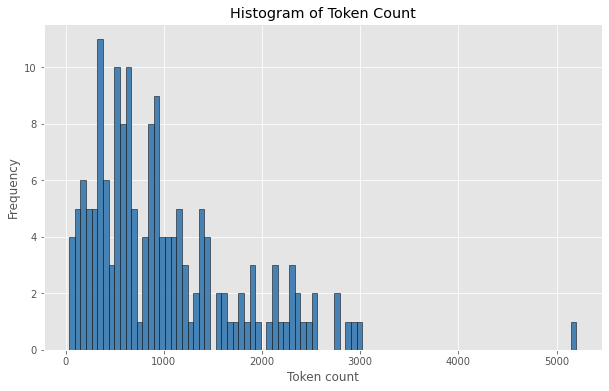

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6)) # Make it 14x7 inch
plt.hist(tokens, bins=90, linewidth=0.5,  ec="black", color = "steelblue")
plt.title('Histogram of Token Count') 
plt.xlabel('Token count') 
plt.ylabel('Frequency') 
plt.savefig('images/token_count_hist.png')
plt.show()

In [18]:
min(tokens)

36

In [19]:
short_docs = [i for i in dataset_docs if num_tokens_from_string(i, "cl100k_base") < 100]

In [20]:
len(short_docs)

6

## Visualize Embeddings

In [21]:
from umap import UMAP
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

In [22]:
# Load embeddings
dataset_embs = np.array(dataset_data['embeddings'])

In [23]:
# Reduce dimensionality of embeddings
projections = UMAP(n_neighbors=10, n_components=2, min_dist=0.1, metric='cosine').fit_transform(dataset_embs)

In [24]:
fig = px.scatter(projections, x=0, y=1)

In [25]:
fig.write_image("images/umap_10neig_2cmp.jpeg")

In [26]:
dataset_docs[5]

'Despite improvements in outcomes for patients with localized Ewing sarcoma, patients with\n relapsed metastatic Ewing sarcoma continue to have poor outcomes with current chemotherapy\n options. A large body of preclinical data supports a role for IGF-1R inhibition in the\n treatment of Ewing sarcoma.\n More recently, clinical trials of IGF-1R monoclonal antibodies have demonstrated single-\n agent activity in patients with relapsed Ewing sarcoma. Ganitumab (AMG 479) is a fully human\n monoclonal antibody directed against IGF-1R. We are proposing this single-agent expanded\n access IND to provide our patient the opportunity to benefit from this treatment after having\n developed progressive disease after multiple lines of prior therapy.\n ;\n ;\n Inclusion Criteria:\n Diagnosis: Confirmed translocation-positive Ewing sarcoma\n Organ Function Requirements:\n Serum creatinine < 1.4 Adequate liver function\n - Total bilitubin <1.5x upper limit of normal for age\n - SGPT (ALT) < 5x upper l